# Exercises week 36

## Deriving and Implementing Ridge Regression

## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have?

**b)** Why is it bad for a model to have too many degrees of freedom?

**c)** Why is it bad for a model to have too few degrees of freedom?

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7). What is the expression for the effective degrees of freedom of the ridge regression fit?

**e)** Why might we want to use Ridge regression instead of OLS?

**f)** Why migth we want to use OLS instead of Ridge regression?

**Solution:**

a) The degrees of freedom of an OLS model corresponds to the rank of the feature matrix $X$. Since $1,x,x^2, x^3$ are linearly independent, $X$ has rank $4$.

b) With too many degrees of freedom we risk overfitting, as we saw in the exercises last weak, and in Figure 2.11 in Hastie et al.'s book.

c) With too few degrees of freedom, we risk underfitting i.e. have high bias. Also see figure 2.11 in Hastie et al. 

d) The effective degrees of freedom of the ridge regression fit is given by the expression

$$
\text{df}(\lambda) = \text{{tr}}[X(X^T X + \lambda I)^{-1} X^T] = \text{tr}[H_{\lambda}] = \sum_{j=1}^p \frac{d^2_j}{d^2_j + \lambda},
$$


where $d_1 , \dots , d_p$ are the singular values of $X$.


e) A common reason of using Ridge regression over OLS is that the matrix $X^T X$ may not be invertible, where $X$ is the feature matrix. Where as the adding of the regularization parameter garantues invertibility. Another reason is that the regularization parameter may reduce the risk of overfitting. 

f) If our matrix $X^T X$ is invertible and not ill-conditioned, it is often preferable to use OLS. Adding the regularization parameter adds some amount of bias by shrinking coefficients. Hence if it can be avoided, it can sometimes be more optimal. 



## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

**Solution:**

We rewrite 

$$
\Vert y - X \beta \Vert_2^{2} + \lambda \Vert \beta \Vert_2^{2}  = (y- X \beta)^T (y-X \beta) + \lambda \beta^T \beta.
$$

For simplicity let $ f(\beta) = (y- X \beta)^T (y-X \beta) + \lambda \beta^T \beta $. Then 

$$
\frac{\partial f(\beta)}{\partial \beta} = \frac{ \partial (y- X \beta)^T (y-X \beta)}{\partial \beta} + \frac{\partial \beta^T \beta}{\partial \beta}.
$$

By the exercises from last week, we know that 

$$
\frac{ \partial (y- X \beta)^T (y-X \beta)}{\partial \beta} = -2(y - X \beta)^T X.
$$

Moreover we compute the partial derivative

$$
\frac{\partial \beta^T}{\partial \beta_i} = \lambda \sum_{k = 0}^{n-1} \frac{\partial \beta_k^2}{\partial \beta_i} = \lambda \sum_{k=0}^{n-1} 2 \beta_k \delta_{ki} = 2 \lambda \beta_i.
$$

Hence we find that 
$$
\frac{\partial \beta^T \beta}{\partial \beta} = 2 \lambda \beta^T.
$$


Meaning we have that

$$

\frac{\partial f(\beta)}{\partial \beta} = -2 (y - X \beta)^T X + 2 \lambda \beta^T.

$$

We must now solve $\frac{\partial f(\beta)}{\partial \beta} = 0$ for $\beta$. We assume that $\lambda > 0$ such that $(X^T X + \lambda I)$ is self adjoint and invertible. We get that

$$
-(y - X \beta)^T X + \lambda \beta^T = 0.
$$

Hence 

$$
y^T X - \beta^T X^T X = \lambda \beta^T.
$$

Meaning 

$$
y^T X = \lambda \beta^T + \beta^T X^T X = \beta^T (X^T X + \lambda I).
$$

By multiplying $(X^T X + \lambda I)^{-1}$ on both sides we get that

$$
\beta^T = y^T X(X^T X + \lambda I)^{-1}.
$$

Since $y^T X(X^T X + \lambda I)$ is self adjoint, so is $y^T X(X^T X + \lambda I)^{-1}$. Thus we finally get that

$$
\hat{\beta}_{\text{Ridge}} = (X^T X + \lambda I)^{-1} X^T y.
$$

## Exercise 3 - Scaling data

In [745]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [746]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1,n)



**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [747]:
def polynomial_features(x, p, intercept=False):
    n = len(x)
    if intercept:
        X = np.zeros((n, p + 1))
        for i in range(0,p+1):
                X[:,i] = x**i
        return X

    X = np.zeros((n, p))
    for i in range(0,p):
            X[:,i] = x**(i+1)
    return X

    
X = polynomial_features(x, 5)

print(X)



[[-3.00000000e+00  9.00000000e+00 -2.70000000e+01  8.10000000e+01
  -2.43000000e+02]
 [-2.93939394e+00  8.64003673e+00 -2.53964716e+01  7.46502347e+01
  -2.19426447e+02]
 [-2.87878788e+00  8.28741965e+00 -2.38577232e+01  6.86813245e+01
  -1.97718964e+02]
 [-2.81818182e+00  7.94214876e+00 -2.23824192e+01  6.30777269e+01
  -1.77764503e+02]
 [-2.75757576e+00  7.60422406e+00 -2.09692239e+01  5.78242235e+01
  -1.59454677e+02]
 [-2.69696970e+00  7.27364555e+00 -1.96168016e+01  5.29059195e+01
  -1.42685662e+02]
 [-2.63636364e+00  6.95041322e+00 -1.83238167e+01  4.83082440e+01
  -1.27358098e+02]
 [-2.57575758e+00  6.63452709e+00 -1.70889334e+01  4.40169497e+01
  -1.13376992e+02]
 [-2.51515152e+00  6.32598714e+00 -1.59108162e+01  4.00181133e+01
  -1.00651618e+02]
 [-2.45454545e+00  6.02479339e+00 -1.47881292e+01  3.62981354e+01
  -8.90954232e+01]
 [-2.39393939e+00  5.73094582e+00 -1.37195370e+01  3.28437400e+01
  -7.86259231e+01]
 [-2.33333333e+00  5.44444444e+00 -1.27037037e+01  2.96419753e+01

In [748]:
# def polynomial_features(x, p, intercept=False):
#     n = len(x)
#     X = np.zeros((n, p))
#     X[:, 0] = x[:]
#     X[:, 1] = x**2
#     X[:, 2] = x**3
#     return X

**b)** Split your data into training and test data(80/20 split)

In [749]:
X = polynomial_features(x, 3)

In [750]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [751]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)





## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [752]:
def Ridge_parameters(X, y, l=0):
    # Assumes X is scaled and has no intercept column
    I = np.eye(X.shape[1])
    return np.linalg.inv(X.T @ X + l * I) @ X.T @ y

# beta = Ridge_parameters(X_train_s, y_train,0.01)
beta = Ridge_parameters(X_train_s, y_train)

**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

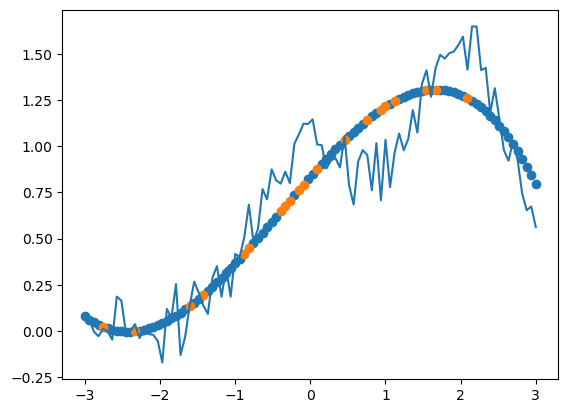

In [753]:
plt.plot(x, y)
plt.scatter(X_train[:,0], X_train_s @ beta + y_offset)
plt.scatter(X_test[:,0], X_test_s @ beta + y_offset)

#Noise is included in the fitting


## Exercise 5 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

Train MSE: {1: 0.05027005373648362, 2: 0.04619314736743778, 3: 0.033125827965197405, 4: 0.032671928947119865, 5: 0.023700775917447233}
Test MSE: {1: 0.17075137231851528, 2: 0.12130646891572665, 3: 0.05348129907770518, 4: 0.048234698941490434, 5: 0.028280396869476105}


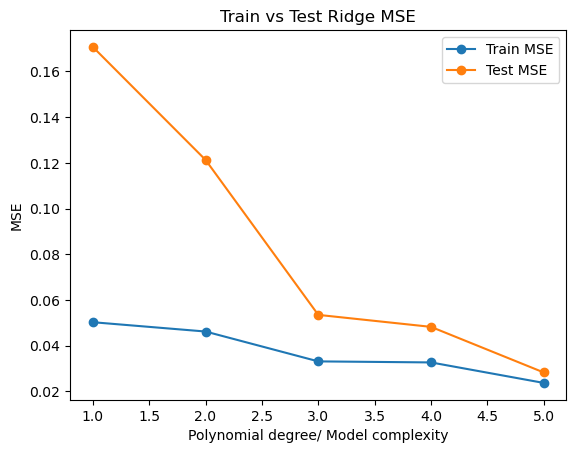

False

In [754]:
#Problem a)

from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,)


train_mse = {}
test_mse = {}

for t in range(1,6):
    Model_train = polynomial_features(x_train,t)
    Model_test = polynomial_features(x_test,t)


    scaler = StandardScaler()
    scaler.fit(Model_train)
    Model_train_s = scaler.transform(Model_train)
    Model_test_s = scaler.transform(Model_test)



    Ridge_beta  = Ridge_parameters(Model_train_s, y_train ,0.01)

    pred_Model_train_s = Model_train_s @ Ridge_beta + y_offset
    pred_Model_test_s = Model_test_s @ Ridge_beta + y_offset

    
    train_mse[t] = mean_squared_error(y_train, pred_Model_train_s)
    test_mse[t] = mean_squared_error(y_test, pred_Model_test_s) 

print("Train MSE:" , train_mse)
print("Test MSE:", test_mse)



degrees = list(range(1, 6))
plt.figure()
plt.plot(degrees, [train_mse[d] for d in degrees], marker="o", label="Train MSE")
plt.plot(degrees, [test_mse[d]  for d in degrees], marker="o", label="Test MSE")
plt.xlabel("Polynomial degree/ Model complexity")
plt.ylabel("MSE") 
plt.legend(); plt.title("Train vs Test Ridge MSE")
plt.show()


np.allclose(X_train_s.mean(axis=0), 0, atol=1e-12)
np.allclose(X_test_s.mean(axis=0), 0, atol=1e-2)  # not zero, but small





Train MSE: {1: 0.0331362614977583, 2: 0.033125827965197405, 3: 0.03312572060217226, 4: 0.033125719525442104, 5: 0.033125719514671706}
Test MSE: {1: 0.054355365569298875, 2: 0.05348129907770518, 3: 0.053393940261518814, 4: 0.053385205120924296, 5: 0.0533843316145461}


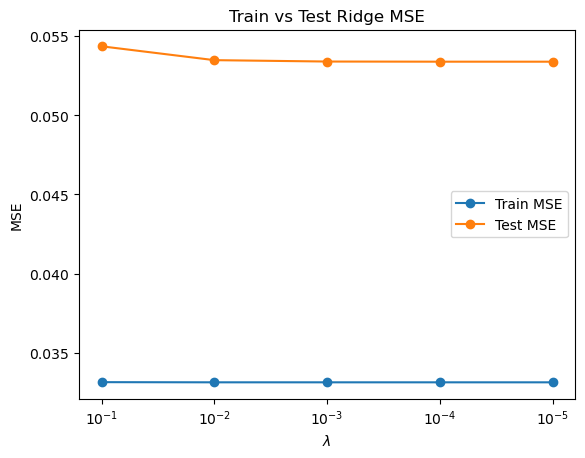

In [755]:
#Problem b)


train_mse = {}
test_mse = {}

for t in range(1,6):
    Model_train = polynomial_features(x_train,3)
    Model_test = polynomial_features(x_test,3)


    scaler = StandardScaler()
    scaler.fit(Model_train)
    Model_train_s = scaler.transform(Model_train)
    Model_test_s = scaler.transform(Model_test)



    Ridge_beta  = Ridge_parameters(Model_train_s, y_train, 10**(-t))

    pred_Model_train_s = Model_train_s @ Ridge_beta + y_offset
    pred_Model_test_s = Model_test_s @ Ridge_beta + y_offset

    
    train_mse[t] = mean_squared_error(y_train , pred_Model_train_s)
    test_mse[t] = mean_squared_error(y_test , pred_Model_test_s) 

print("Train MSE:" , train_mse)
print("Test MSE:", test_mse)


orders = -np.arange(1, 6)   

magnitudes = list(range(1, 6))
plt.figure()
plt.plot([rf'$10^{{{e}}}$' for e in orders], [train_mse[d] for d in magnitudes], marker="o", label="Train MSE")
plt.plot([rf'$10^{{{e}}}$' for e in orders], [test_mse[d]  for d in magnitudes], marker='o', label="Test MSE")
plt.xlabel("$\lambda$")
plt.ylabel("MSE")
plt.legend(); plt.title("Train vs Test Ridge MSE")
plt.show()




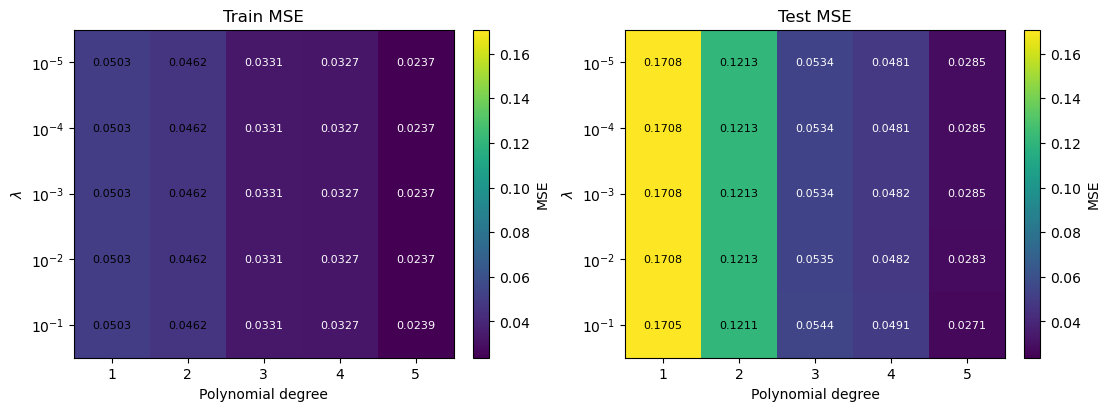

In [ ]:
# Problem c)

degrees = np.arange(1, 6)
orders = -np.arange(1, 6)                 
lambdas = 10.0 ** orders              

train_mse = np.zeros((len(lambdas), len(degrees)))
test_mse  = np.zeros((len(lambdas), len(degrees)))

for i, p in enumerate(degrees):
   
    Model_train = polynomial_features(x_train, p)
    Model_test = polynomial_features(x_test,  p)

  
    scaler = StandardScaler()
    scaler.fit(Model_train)
    X_train_s = scaler.transform(Model_train)
    X_test_s  = scaler.transform(Model_test)


    for j, l in enumerate(lambdas):
        beta = Ridge_parameters(X_train_s, y_train, l)

        yhat_tr = X_train_s @ beta + y_offset
        yhat_te = X_test_s  @ beta + y_offset

        train_mse[j, i] = mean_squared_error(y_train, yhat_tr)
        test_mse[j,  i] = mean_squared_error(y_test,  yhat_te)

fig, axes = plt.subplots(1, 2, figsize=(11, 4), constrained_layout=True)

# share color scale across both heatmaps
vmin = np.minimum(train_mse.min(), test_mse.min())
vmax = np.maximum(train_mse.max(), test_mse.max())

for ax, Z, title in zip(axes, [train_mse, test_mse], ["Train MSE", "Test MSE"]):
    im = ax.imshow(Z, origin="lower", aspect="auto", vmin=vmin, vmax=vmax, cmap="viridis")
    th = 0.5 * (Z.min() + Z.max())

    # Plotting the MSE in the cells of the heatmap

    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            ax.text(j, i, f'{Z[i, j]:.4f}', ha="center", va="center",
                    color='black' if Z[i, j] > th else "white", fontsize=8)
    ax.set_xticks(np.arange(len(degrees)))
    ax.set_xticklabels(degrees)
    ax.set_yticks(np.arange(len(lambdas)))
    ax.set_yticklabels([rf'$10^{{{e}}}$' for e in orders])
    ax.set_xlabel("Polynomial degree")
    ax.set_ylabel("$\lambda$")
    ax.set_title(title)
    fig.colorbar(im, ax=ax, label="MSE")

plt.show()

#I used the manual for heatmaps 
# and got help from ChatGPT with the customization of the cells and debugging of the heatmap plotting code. 